# Project Overview

To develop a model to predict SyrialTel customer churn. SyriaTel is a company in the telecom business

## Data source
I have chosen a dataset from the curated list, here is the link

https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset


## Project objective

To building a classifier to predict SyrialTel customer churn so that we can help  the company implement methods for reducing customer attrition and retaining business.


## Methods:
The project adopts the CRISP-DM (Cross-Industry Standard Process for Data Mining) methodology, which encompasses several stages: data understanding, data preparation, modeling, evaluation, and deployment. In the modeling phase, a range of predictive models will be constructed and assessed. The process will commence with a fundamental logistic regression model and progress towards more intricate models like Decision Trees. Performance evaluation will be conducted using metrics such as accuracy, precision, recall, and F1-score.

## Business Problem
The business problem is to identify customers from the customer base of a telecommunications company who exhibit a high likelihood of churning, indicating their potential to discontinue using the company's services. This identification will facilitate the development of effective strategies by the telco to retain these customers and enhance overall business performance.Its known that retaining a customer is less expensive than getting new customers.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("C:\\Users\\USER\\Desktop\\phase3_data_sets\\dsc-phase-3-choosing-a-dataset-main\\bigml_59c28831336c6604c800002a.csv")



In [3]:
df.shape

(3333, 21)

In [4]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [6]:
#Summary of Features in the Dataset

**A Summary of the dataset columns**

1. state: The state in which the customer resides (categorical).

2. account length: The length of time the customer has had an account with the company (numerical).

3. area code: The area code associated with the customer's phone number (categorical).

4. phone number: The customer's phone number, likely unique to each customer (string).

5. international plan: Whether the customer has an international calling plan (binary - yes/no).

6. voice mail plan: Whether the customer has a voicemail plan (binary - yes/no).

7. number vmail messages: The number of voicemail messages the customer has (numerical).

8. total day minutes: Total minutes used during the day (numerical).

9. total day calls: Total calls made during the day (numerical).

10. total day charge: Total charge for day usage (numerical).

11. total eve minutes: Total minutes used during the evening (numerical).

12. total eve calls: Total calls made during the evening (numerical).

13. total eve charge: Total charge for evening usage (numerical).

14. total night minutes: Total minutes used during the night (numerical).

15. total night calls: Total calls made during the night (numerical).

16. total night charge: Total charge for night usage (numerical).

17. total intl minutes: Total international minutes used (numerical).

18. total intl calls: Total international calls made (numerical).

19. total intl charge: Total charge for international usage (numerical).

20. customer service calls: Number of calls to customer service (numerical).

21. churn: Target variable indicating whether the customer has churned or not (binary - True/False).

In [7]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


WE START THE DATA CLEANING AND PREPROCESSING

In [8]:
df.isnull().sum()


state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

From the above we realise  we have no missing values.

In [9]:
# Checking the duplicates
df.duplicated().sum()

0

Now that we have no case of missing values and duplicates we will perfom EDA
to help us gain a deep understanding of SyrialTel data before we proceed to more advanced tasks like modeling and inference

## Exploratory Data Analysis 

We will now proceed to drop columns which are of no use to our analysis.
- The phone number column, it doesn't have an effect on the customer retention or customer leaving.
- The account length column, does not provide any meaningful information on customer churning.
- The area code column, we will not use this in our customer churning prediction

In [10]:
#separating categorical and numerical columns for easier analysis 
numerical_columns = df[['number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls']]
categorical_columns = df[['state', 'churn', 'international plan', 'voice mail plan']]

In [11]:
dropped_columns = ['account length', 'phone number', 'area code', ]
df.drop(columns=dropped_columns, inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   international plan      3333 non-null   object 
 2   voice mail plan         3333 non-null   object 
 3   number vmail messages   3333 non-null   int64  
 4   total day minutes       3333 non-null   float64
 5   total day calls         3333 non-null   int64  
 6   total day charge        3333 non-null   float64
 7   total eve minutes       3333 non-null   float64
 8   total eve calls         3333 non-null   int64  
 9   total eve charge        3333 non-null   float64
 10  total night minutes     3333 non-null   float64
 11  total night calls       3333 non-null   int64  
 12  total night charge      3333 non-null   float64
 13  total intl minutes      3333 non-null   float64
 14  total intl calls        3333 non-null   

In [13]:
df.describe()

,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


### Categorical Features Analysis

In [14]:
#Analysis of churn column, which is our target variable
print(df.churn.value_counts())


False    2850
True      483
Name: churn, dtype: int64


From above , True indicates customers who stopped purchasing SyriaTel services while False shows customers who remained loyal

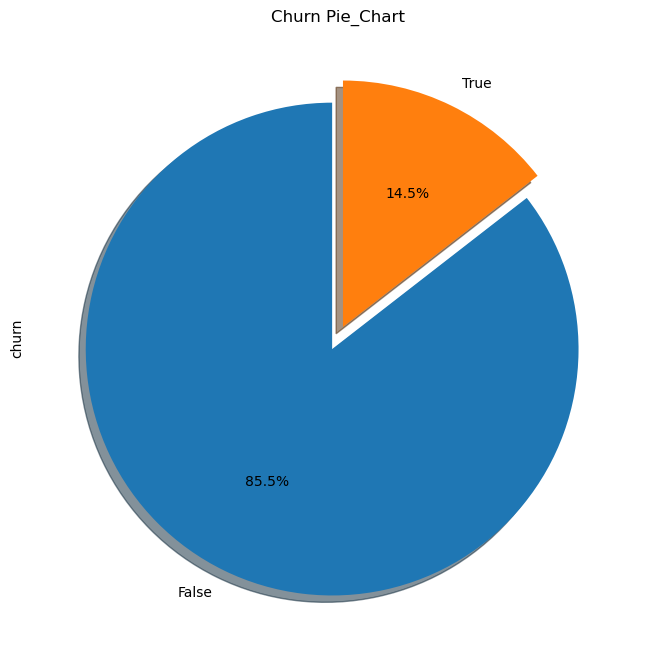

In [15]:
# Next we get a pie chart for the churn target variable

df['churn'].value_counts().plot.pie(explode=[0.05,0.05], autopct='%1.1f%%', startangle=90, shadow=True, figsize=(8,8))
plt.title('Churn Pie_Chart')
plt.show()

From the above Pie chart, the percentage of 14.5 for True(customers who left) and 85.5 false (loyal customers).This percentages show that the data is imbalanced. This imbalance will have to be addressed to avoid false predictions

### Visualization of relationships in columns

In [16]:
# We first get the total calls made per state
df['total_calls'] = df['total day calls'] + df['total eve calls'] + df['total night calls'] + df['total intl calls']
df.groupby('state')['total_calls'].sum().sort_values(ascending=False)

state
WV    32523
MN    25807
NY    25092
AL    24070
OH    24060
WY    23751
OR    23497
VA    23483
WI    23463
ID    22722
MI    22657
CT    22492
VT    22146
TX    22144
IN    22096
UT    21761
KS    21426
NC    21172
NJ    20970
MD    20868
MT    20377
WA    20084
NV    20023
MS    19911
FL    19797
AZ    19671
MA    19602
RI    19525
CO    19434
ND    19394
MO    19348
NM    19278
ME    19075
OK    18930
NE    18718
SC    18397
DE    18392
KY    17971
IL    17752
SD    17517
GA    17087
AR    16705
NH    16585
DC    16401
HI    16188
TN    16102
LA    15523
AK    15288
PA    13637
IA    13528
CA    10582
Name: total_calls, dtype: int64

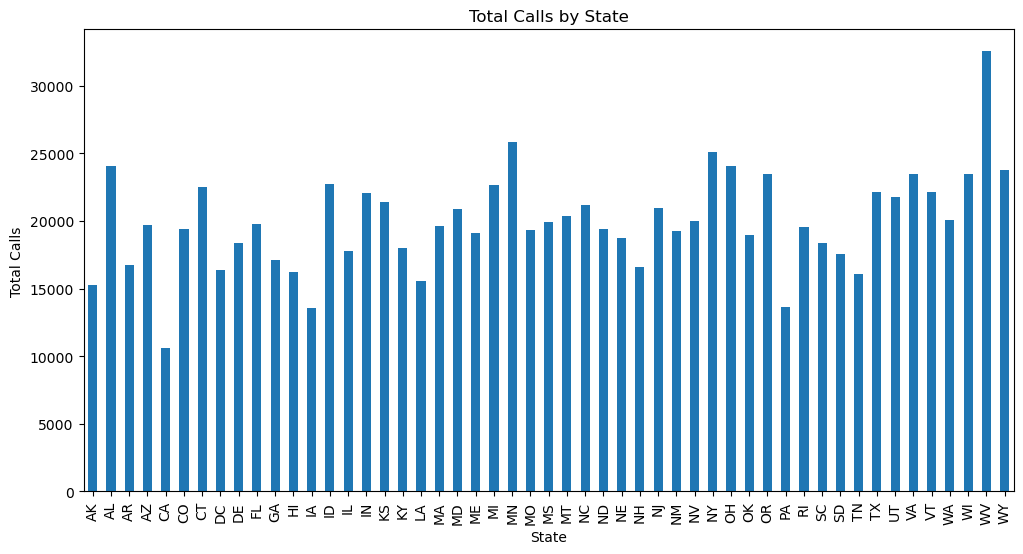

In [17]:
#visualizing the total calls vs the state 
df.groupby('state')['total_calls'].sum().plot(kind='bar', figsize=(12, 6), rot=90)

# Add labels and title to the plot
plt.title('Total Calls by State')
plt.xlabel('State')
plt.ylabel('Total Calls')

# Display the plot
plt.show()

From above bar graph we see that minnesota(MA) ,west virginia (WV) and new york(NY) have the most number of calls more than 25,000. while califonia(CA) has the least number of calls.

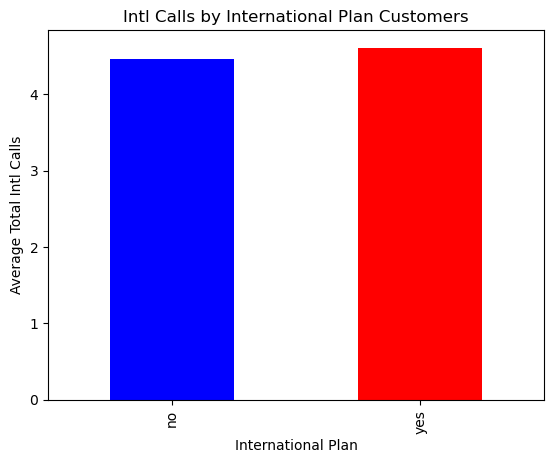

In [18]:
#visualizing for the international calls made by people 
# Group by 'international plan' and calculate the mean of 'total intl calls'
grouped_data = df.groupby('international plan')['total intl calls'].mean()

# Plot the bar plot
fig, ax = plt.subplots()
grouped_data.plot(kind='bar', color=['blue', 'red'], ax=ax)

# Add labels and title to the plot
ax.set_xlabel('International Plan')
ax.set_ylabel('Average Total Intl Calls')
ax.set_title('Intl Calls by International Plan Customers')

# Display the plot
plt.show()


There is no significant difference between the total international calls made by the people have subscribed to the international plan and those who have not subscribed to the plan.

<Axes: xlabel='count', ylabel='customer service calls'>

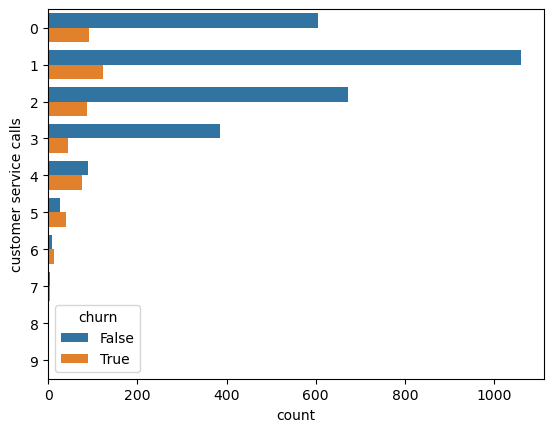

In [19]:
# Visualizing the relationship between the number of calls made to the call center and customer churning

sns.countplot(y='customer service calls', hue='churn', data=df) #using searbon to plot the countplot

The chart above shows the positive correlation between customer retention and calls made to the call centre

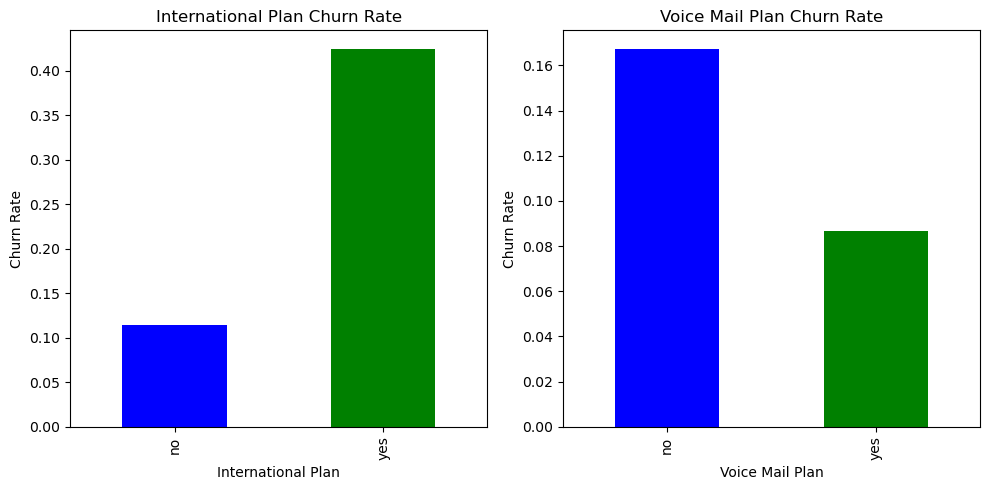

In [20]:
#visualizing of the churning rate for the international plan and voice mail plan

# Map the values in 'voice mail plan' column to labels

# Create a figure with one row and two columns
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first subplot: International Plan
df.groupby('international plan')['churn'].mean().plot(kind='bar', ax=axes[0], color=['blue', 'green'])
axes[0].set_xlabel('International Plan')
axes[0].set_ylabel('Churn Rate')
axes[0].set_title('International Plan Churn Rate')

# Plot the second subplot: Voice Mail Plan
df.groupby('voice mail plan')['churn'].mean().plot(kind='bar', ax=axes[1], color=['blue', 'green'])
axes[1].set_xlabel('Voice Mail Plan')
axes[1].set_ylabel('Churn Rate')
axes[1].set_title('Voice Mail Plan Churn Rate')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


From the above graphs its very clear that churning rate is higher for customers who have subscribed to the international plan while customers who have subscribed to the voice mail plan stay longer.

### Numerical feature Analysis

C:\Users\USER\AppData\Local\Temp\ipykernel_11532\3088240980.py:15: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


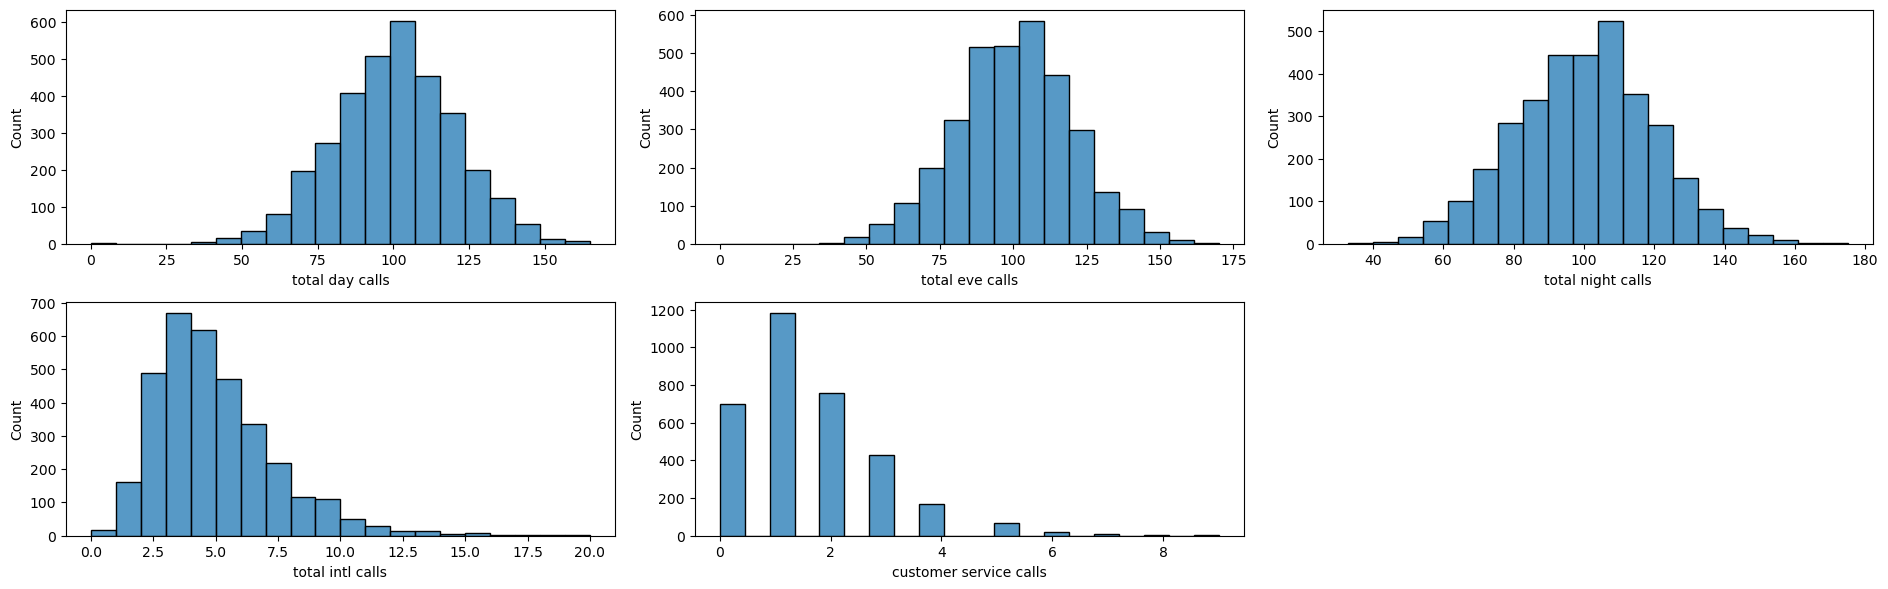

In [21]:
# Visualization of the calls distribution

f, ax = plt.subplots(2, 3, figsize=(19, 6), constrained_layout=True)

sns.histplot(df["total day calls"], bins=20, ax=ax[0, 0])
sns.histplot(df["total eve calls"], bins=20, ax=ax[0, 1])
sns.histplot(df["total night calls"], bins=20, ax=ax[0, 2])
sns.histplot(df["total intl calls"], bins=20, ax=ax[1, 0])
sns.histplot(df["customer service calls"], bins=20, ax=ax[1, 1])

# Remove the extra subplot
f.delaxes(ax[1, 2])

# Adjust the spacing between the subplots
plt.tight_layout()

# Show the plot
plt.show()

- From the above plots, all of the above graphs  except customer service calls, have a normal distribution. Total international calls seems to be skewed to the right side however it is still normally distributed.

### Outliers 

In [22]:
#writing a function to check for outliers 
def detect_outliers(data):
# Calculating the quartiles and IQR
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
# determining the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
# identifying outliers 
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

In [23]:
#checking for outliers using the function 
detect_outliers(numerical_columns).sum()

number vmail messages       51.00
total day minutes         3928.20
total day calls           1807.00
total day charge           667.81
total eve minutes         4175.90
total eve calls           1836.00
total eve charge           354.95
total night minutes       6180.80
total night calls         2647.00
total night charge         278.13
total intl minutes         286.60
total intl calls          1001.00
total intl charge           91.57
customer service calls    1223.00
dtype: float64

From the above we find the presence of outliers , we will now proceed to remove the identified outliers

In [24]:
def remove_outliers(data):
    # Calculating the quartiles and IQR
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Determining the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Removing outliers
    filtered_data = data[(data >= lower_bound) & (data <= upper_bound)]
    
    return filtered_data

In [25]:
# #using the function above to remove outliers 
filtered_data = remove_outliers(numerical_columns)

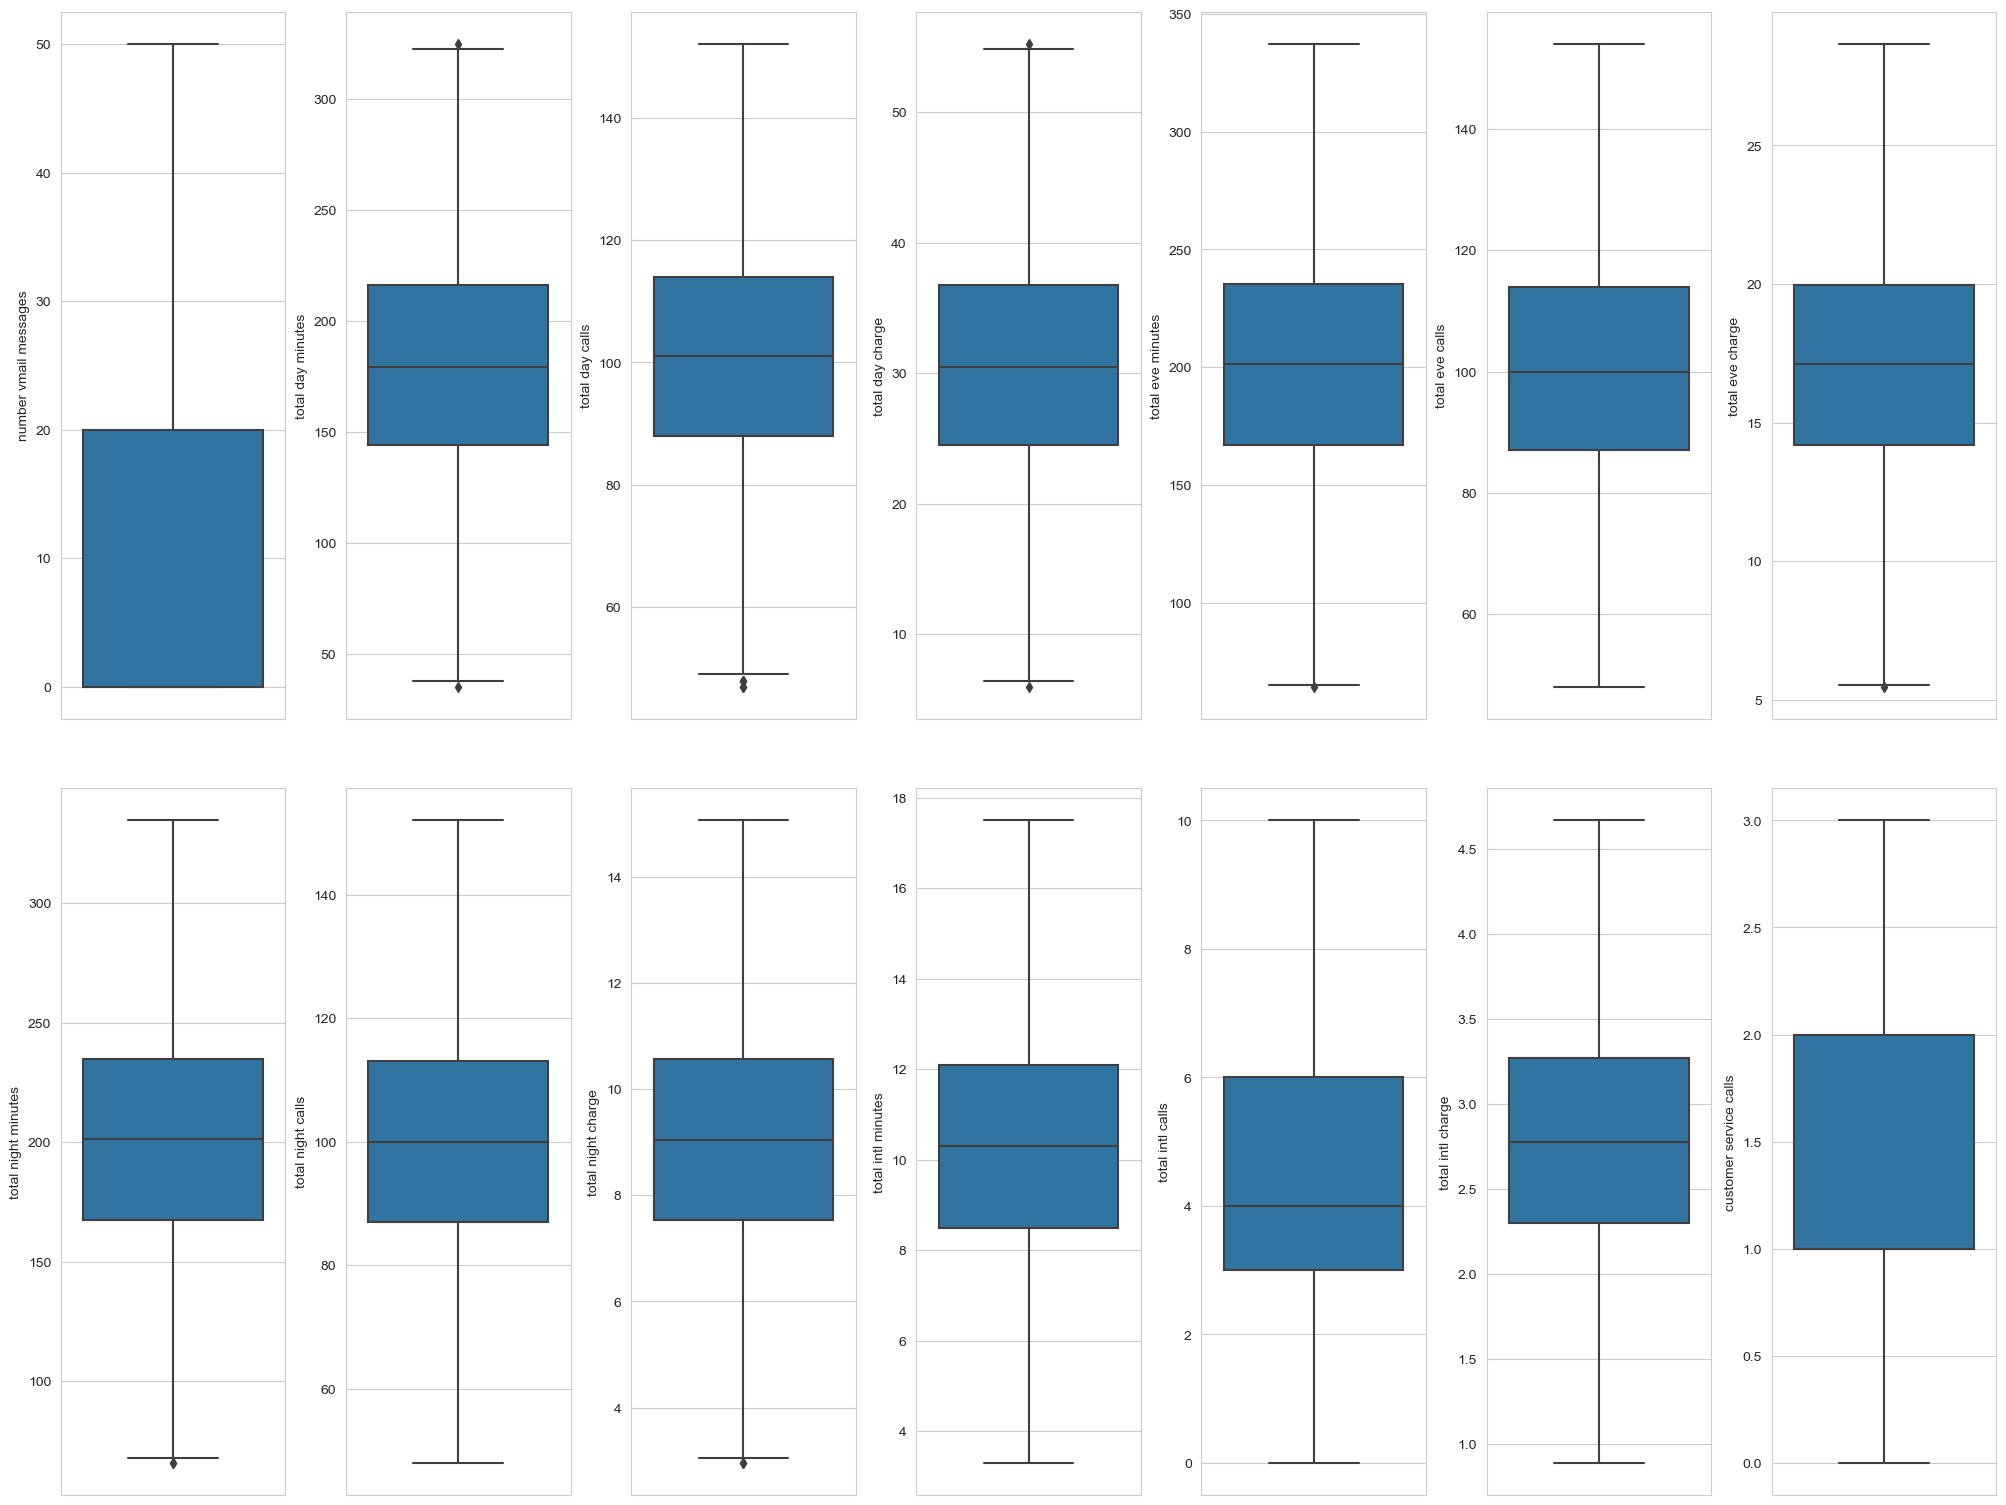

In [26]:
#checking for any outliers in the dataset using box plot 
# visualizing with matplotlib and seaborn 
sns.set_style('whitegrid')
fig,ax = plt.subplots(ncols=7,nrows =2,figsize = (20,15))
index = 0 
ax = ax.flatten()
for col,value in filtered_data.items():
    sns.boxplot(y = col,data = filtered_data,ax = ax[index])
    index += 1
plt.tight_layout(pad= 0.5,w_pad= 0.7,h_pad=5.0);

## Heat map.

In order to select best features for modelling we will use heatmap to check the correlation existing between variables to be used in the model

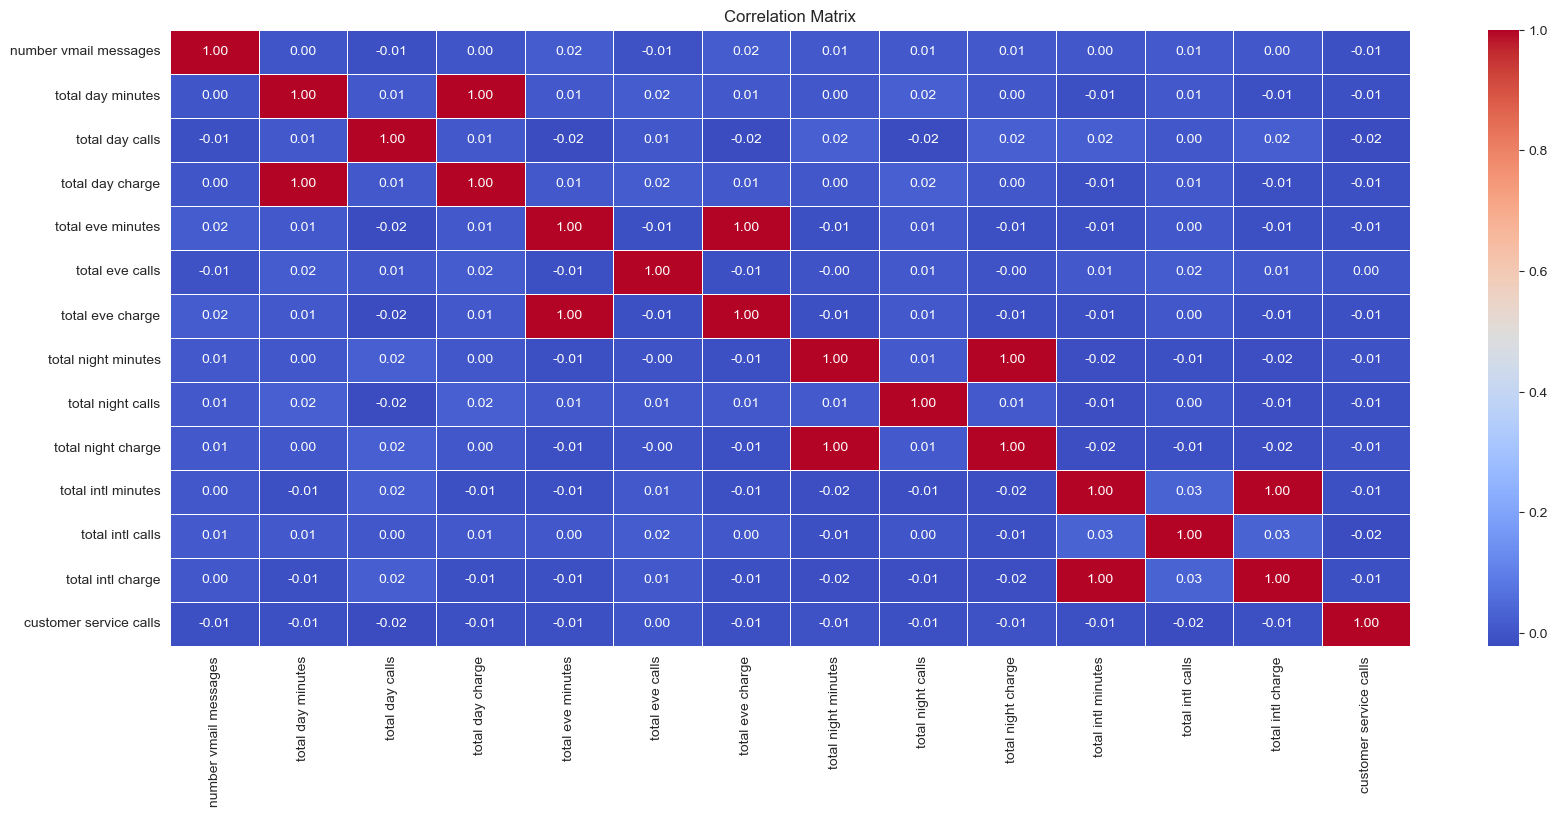

In [27]:
#using heatmap to check for correlation 
correlation_matrix = numerical_columns.corr()
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

From the above Heatmap,the following variables ;`total day minutes`, `total eve minutes`, /`total night minutes` and `total intl minutes` have perfect correlation. This brings multicollinearity which causes instability,redudancy and difficulties in interpreting the individual impact of each predictor variable on the dependent variable

In [28]:
new_df = df.drop(columns=['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes'], axis=1)
new_df.head()

,state,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls,churn,total_calls
0,KS,no,yes,25,110,45.07,99,16.78,91,11.01,3,2.70,1,False,303
1,OH,no,yes,26,123,27.47,103,16.62,103,11.45,3,3.70,1,False,332
2,NJ,no,no,0,114,41.38,110,10.30,104,7.32,5,3.29,0,False,333
3,OH,yes,no,0,71,50.90,88,5.26,89,8.86,7,1.78,2,False,255
4,OK,yes,no,0,113,28.34,122,12.61,121,8.41,3,2.73,3,False,359


In [29]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   international plan      3333 non-null   object 
 2   voice mail plan         3333 non-null   object 
 3   number vmail messages   3333 non-null   int64  
 4   total day calls         3333 non-null   int64  
 5   total day charge        3333 non-null   float64
 6   total eve calls         3333 non-null   int64  
 7   total eve charge        3333 non-null   float64
 8   total night calls       3333 non-null   int64  
 9   total night charge      3333 non-null   float64
 10  total intl calls        3333 non-null   int64  
 11  total intl charge       3333 non-null   float64
 12  customer service calls  3333 non-null   int64  
 13  churn                   3333 non-null   bool   
 14  total_calls             3333 non-null   

### Transforming categorical variables using One Hot EnCoding

In [30]:
# Select the categorical columns to be one-hot encoded
categorical_columns = ['international plan', 'voice mail plan','state']

# Create an instance of the OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the categorical columns
encoded_data = encoder.fit_transform(new_df[categorical_columns])

# Use the get_feature_names_out method to get the feature names
feature_names = encoder.get_feature_names_out(input_features=categorical_columns)

# Convert the encoded data to a DataFrame
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=feature_names)

# Concatenate the encoded DataFrame with the remaining columns from the original DataFrame
final_df = pd.concat([new_df.drop(categorical_columns, axis=1), encoded_df], axis=1)
final_df


,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,25,110,45.07,99,16.78,91,11.01,3,2.70,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,26,123,27.47,103,16.62,103,11.45,3,3.70,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,114,41.38,110,10.30,104,7.32,5,3.29,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,71,50.90,88,5.26,89,8.86,7,1.78,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,113,28.34,122,12.61,121,8.41,3,2.73,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,36,77,26.55,126,18.32,83,12.56,6,2.67,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3329,0,57,39.29,55,13.04,123,8.61,4,2.59,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3330,0,109,30.74,58,24.55,91,8.64,6,3.81,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3331,0,105,36.35,84,13.57,137,6.26,10,1.35,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 67 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   number vmail messages   3333 non-null   int64  
 1   total day calls         3333 non-null   int64  
 2   total day charge        3333 non-null   float64
 3   total eve calls         3333 non-null   int64  
 4   total eve charge        3333 non-null   float64
 5   total night calls       3333 non-null   int64  
 6   total night charge      3333 non-null   float64
 7   total intl calls        3333 non-null   int64  
 8   total intl charge       3333 non-null   float64
 9   customer service calls  3333 non-null   int64  
 10  churn                   3333 non-null   bool   
 11  total_calls             3333 non-null   int64  
 12  international plan_no   3333 non-null   float64
 13  international plan_yes  3333 non-null   float64
 14  voice mail plan_no      3333 non-null   

In [32]:
#convert churn using label encoder using a function
def encode(column):
    le = LabelEncoder()
    final_df[column] = le.fit_transform(final_df[column])
#encoding the column 
encode('churn')
#checking for encorded churn column
final_df.churn.value_counts()

0    2850
1     483
Name: churn, dtype: int64

### DATA MODELLING

At this stage we will develop and evaluate different data models to find the one that best fits SyriaTel customer churn problem. We will be using both statistical and machine learning techniques such as Logistic regression,Random Forest & Decision tree.We will create predictive models to predict customer churn.

In [33]:
# predators
X = final_df.drop('churn', axis=1)

# target
y = final_df['churn']

X.head()

,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,25,110,45.07,99,16.78,91,11.01,3,2.70,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,26,123,27.47,103,16.62,103,11.45,3,3.70,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,114,41.38,110,10.30,104,7.32,5,3.29,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,71,50.90,88,5.26,89,8.86,7,1.78,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,113,28.34,122,12.61,121,8.41,3,2.73,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
# Test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#### Standardization
* We will use standardization to rescale the features of the final dataset to have zero mean and unit variance. 
* This process will helps us to bring all features to a similar scale, which is be beneficial for our machine learning algorithms that are sensitive to the scale of the input features.

In [35]:
# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform the training and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [36]:
# Creating a instance of SMOTE (Synthetic Minority Over-sampling Technique) to solve class imbalance
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

# Perform SMOTE oversampling on the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

## 1. Building a baseline logistic regression model 

In [37]:
#Building a baseline model logistic regression model 
from sklearn.metrics import accuracy_score
# Create an instance of Logistic Regression
logreg = LogisticRegression(solver='liblinear', random_state=42)

# Fit the model on the training data
logreg.fit(X_train_resampled, y_train_resampled)

# Predict on the training and testing data
y_train_pred = logreg.predict(X_train_resampled)
y_test_pred_1 = logreg.predict(X_test)

# Calculate accuracy on the training and testing data
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred_1)

In [38]:
#creating a function for checking for metrics 
def evaluate_model_metrics(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the training and testing data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate evaluation metrics
    roc_auc_train = roc_auc_score(y_train, y_train_pred)
    roc_auc_test = roc_auc_score(y_test, y_test_pred)
    cm_test = confusion_matrix(y_test, y_test_pred)
    cm_display_train = ConfusionMatrixDisplay(confusion_matrix=cm_test).plot()
    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)

    # Return results
    results = {
        'roc_auc_train': roc_auc_train,
        'roc_auc_test': roc_auc_test,
        'accuracy_train': accuracy_train,
        'accuracy_test': accuracy_test,
        'confusion_matrix_train': cm_display_train
    }
    return results



In [39]:
#creating a function for checking for classification report
def generate_classification_report(y_true, y_pred):
    # Generate classification report with output_dict=True
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    
    # Convert the report to a DataFrame
    report = pd.DataFrame(report_dict).transpose()
    
    return report

In [40]:
# calling the function to get classification report values
from sklearn.metrics import classification_report
logreg_report = generate_classification_report(y_test, y_test_pred_1)
logreg_report

,precision,recall,f1-score,support
0,0.884265,0.959097,0.920162,709.000000
1,0.553846,0.288000,0.378947,125.000000
accuracy,0.858513,0.858513,0.858513,0.858513
macro avg,0.719056,0.623549,0.649555,834.000000
weighted avg,0.834742,0.858513,0.839045,834.000000



* Precision: The precision values for class 0 and class 1 are `0.88` and `0.55`, respectively.Class 0 has a higher precision than class 1, suggesting that the model is better at predicting class 0 than class 1.Therefore, class 1 has a higher rate of false positives compared to class 0 and a higher precision means fewer false positives.

* Recall: The recall values for class 0 and class 1 are `0.960` and `0.288`, respectively. This indicates the model ability to find a significant portion of the actual positive cases. Similar to precision, class 0 has a higher recall than class 1.

* F1-Score: An F1-score of 0.920 for class 0 indicates a high F1-Score, which means that the model achieves a balance between precision and recall for class 0.An F1-score of 0.379 for class 1 suggests a lower F1-Score,the model's precision and recall for class 1 are not as balanced as they are for class 0.

* Accuracy: The accuracy of the model is `0.859`, which indicates the proportion of correctly predicted instances out of the total number of instances. 
* Hence logistic regression has `85.9%` prediction accuracy of test data

* Based on these metrics, it appears that the model performs relatively better for class 0 compared to class 1

{'roc_auc_train': 0.9030826716487623,
 'roc_auc_test': 0.6235486600846262,
 'accuracy_train': 0.9030826716487622,
 'accuracy_test': 0.8585131894484412,
 'confusion_matrix_train': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x1e4f4b0af50>}

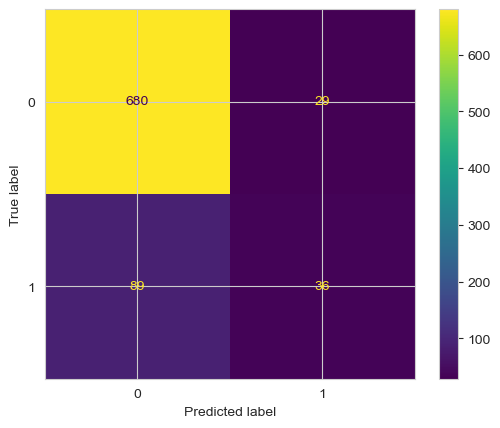

In [41]:
# We use a custom function evaluate_model_metrics to evaluate the performance of the 
# logistic regression model (logreg) on the training and test data
from sklearn.metrics import roc_auc_score, ConfusionMatrixDisplay, classification_report, accuracy_score, confusion_matrix, roc_curve
evaluate_model_metrics(logreg, X_train_resampled,y_train_resampled, X_test, y_test)

* From the above  logistic regression 
* The ROC AUC value is higher for the training data (0.903) compared to the test data (0.624). A higher ROC AUC value for the training data indicates that the model has a relatively high level of discrimination between classes on the training data, which is expected since the model was trained on that data. However, the lower ROC AUC value for the test data suggests that the model's performance on unseen data is not as high, indicating a potential generalization issue.
* Confusion matrix is used to display the predicted and true labels of logistic regression model where the True positives `36`, False negative `89`, True Negative `680` and False positive `29` 
* In summary, the model achieves a training accuracy of approximately `90.3%` and a testing accuracy of around `85.9%`. This indicates that the model performs relatively well in predicting the class labels for both the training and testing datasets.
* we will conduct further analysis to determine the instance of  `overfitting ` and to consider ways to mitigate it

### Cross validation score to improve model performance and reduce overfit

In [42]:
# Create an instance of Logistic Regression with cross-validation
from sklearn.model_selection import cross_val_score
import multiprocessing
from sklearn.feature_selection import SelectFromModel 
from sklearn.linear_model import LogisticRegressionCV

logreg_final = LogisticRegressionCV(Cs=10, cv=5, solver='liblinear')

# Fit the model on the resampled training data
logreg_final.fit(X_train_resampled, y_train_resampled)

# Predict on the resampled training and testing data
y_train_pred = logreg.predict(X_train_resampled)
y_test_pred = logreg.predict(X_test)

# Calculate accuracy on the resampled training and testing data
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

{'roc_auc_train': 0.9033162073797291,
 'roc_auc_test': 0.6240225669957686,
 'accuracy_train': 0.9033162073797291,
 'accuracy_test': 0.8537170263788969,
 'confusion_matrix_train': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x1e4f59978b0>}

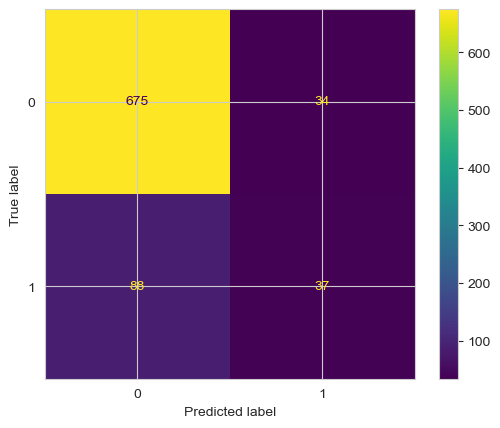

In [43]:
evaluate_model_metrics(logreg_final,X_train_resampled,y_train_resampled,X_test,y_test)


* It can be seen that after using cross validation and picking `5` folds we get an improved model with accuracy mean of `0.903` which represents `90.3%` accuracy level in prediction customer churn in training data while in test data it is `0.85.37`
* This adjusted model demonstrates no reasonable change in level of performance, correctly predicting the class labels for the majority of instances in both the training and testing datasets.
* The testing accuracy is slightly lower than the training accuracy, which is expected but not with a significant difference.
* Therefore from the we will proceed to the second model to check its performance in predicting customer churn and check if its a good perfomer than logistic regresion 

## 2. Building Decison Trees classifier model

In [44]:
# Create an instance of DecisionTreeClassifier with regularization parameters
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(max_depth=5, min_samples_split=5)

# Fit the model on the training data
dt_clf.fit(X_train_resampled, y_train_resampled)

# Predict on the training and testing data
y_train_pred_2= dt_clf.predict(X_train_resampled)
y_test_pred_2 = dt_clf.predict(X_test)

# Calculate accuracy on the training and testing data
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred_2)


{'roc_auc_train': 0.8806632414759459,
 'roc_auc_test': 0.857675599435825,
 'accuracy_train': 0.8806632414759458,
 'accuracy_test': 0.9148681055155875,
 'confusion_matrix_train': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x1e4f9462770>}

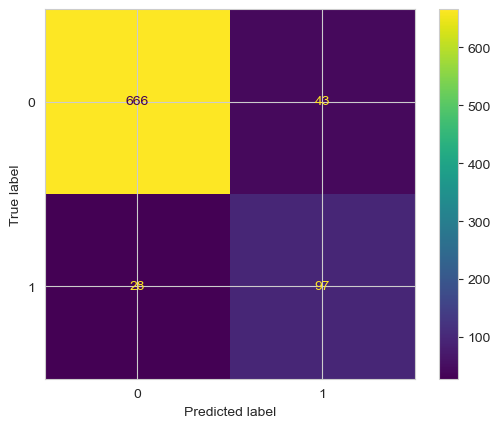

In [45]:
#checking for decison tree metrics using the predefiend function 
evaluate_model_metrics(dt_clf, X_train_resampled, y_train_resampled, X_test, y_test)


- `roc_auc_train`: It measures the model's ability to distinguish between the two classes (positive and negative) in the training data. A value of `0.881` indicates that the model performs well in classifying the training instances.

- `roc_auc_test`:It measures the model's ability to generalize its predictions to unseen data. A value of `0.858` suggests that the model maintains a good level of performance on the testing data, indicating that it is not overfitting.

- `accuracy_train`: It represents the proportion of correctly classified instances in the training set. A value of `0.881 `indicates that the model achieves a high level of accuracy on the training data.

- `accuracy_test`:  A value of `0.915` suggests that the model performs very well on the testing data, indicating that it generalizes well and is not overfitting.

* From the confusion matrix it can be seen that TP `97`, TN `666`, FP `43` and FN `26`, hence there is improved prediction here 
* To get further insights we will check the classification report of all the metrics related to Decison Tree classifier

In [46]:
#using predefined function to check for classification report
dt_clf_report = generate_classification_report(y_test, y_test_pred_2)
dt_clf_report

,precision,recall,f1-score,support
0,0.959654,0.939351,0.949394,709.000000
1,0.692857,0.776000,0.732075,125.000000
accuracy,0.914868,0.914868,0.914868,0.914868
macro avg,0.826256,0.857676,0.840735,834.000000
weighted avg,0.919667,0.914868,0.916822,834.000000




- **Precision**: Precision measures the accuracy of the positive predictions made by the model. For class 0, the precision is 0.959654, and for class 1, it's 0.692857. These values indicate the proportion of true positive predictions within each class.

- **Recall**: Recall measures the ability of the model to identify all relevant instances in the dataset. For class 0, the recall is 0.939351, and for class 1, it's 0.776. These values indicate the proportion of actual positive instances correctly identified by the model.

- **F1-Score**: The F1-score is the harmonic mean of precision and recall. It provides a single metric that balances precision and recall. For class 0, the F1-score is 0.949394, and for class 1, it's 0.732075. These values indicate how well the model balances precision and recall for each class.

- **Accuracy**: The overall accuracy is 0.914868, which means that the model correctly predicts approximately 91.5% of all instances.

- **Macro Avg**: The macro average provides the average of precision, recall, and F1-score across both classes. For precision, recall, and F1-score, the macro averages are 0.826256, 0.857676, and 0.840735, respectively. These values give you an overall performance measure across both classes.

- **Weighted Avg**: The weighted average is similar to the macro average but takes into account the class distribution when calculating the average. For precision, recall, and F1-score, the weighted averages are 0.919667, 0.914868, and 0.916822, respectively.

- In summary the model has high precision and recall for class 0 but slightly lower precision and recall for class 1, resulting in differences in F1-scores between the two classes. The overall accuracy is relatively high, indicating good performance on the test data.

## 3. Building a random forest model

In [47]:
# Create a random forest classifier with regularization parameters
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=5, max_features='sqrt', random_state=42)

# Fit the model on the selected training data
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Predict on the training and testing sets
y_train_pred_3 = rf_classifier.predict(X_train_resampled)
y_test_pred_3 = rf_classifier.predict(X_test)

# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred_3)


{'roc_auc_train': 0.8554413825315274,
 'roc_auc_test': 0.8085190409026798,
 'accuracy_train': 0.8554413825315274,
 'accuracy_test': 0.8705035971223022,
 'confusion_matrix_train': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x1e4f9580280>}

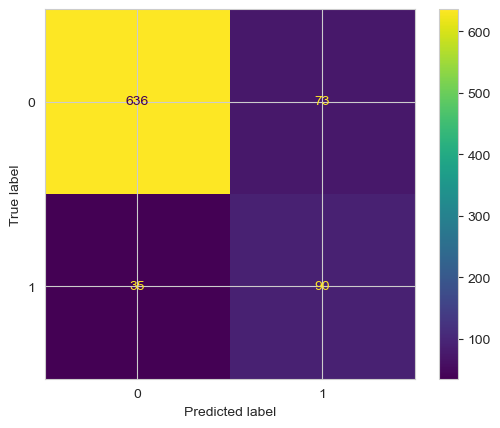

In [48]:
#checking for random forest metrics using the predefiend function 
evaluate_model_metrics(rf_classifier, X_train_resampled, y_train_resampled, X_test, y_test)

* Random Forest classifier achieves an accuracy of approximately `85.5%` on the training data and `87.1%` on the testing data. It shows good performance in distinguishing between the positive and negative classes, with an area under the ROC curve (AUC) of `0.85` on the training data and `0.81` on the testing data. Overall, the model performs well and demonstrates a high level of accuracy in predicting the target variable.
* The confusion matrix TP is `90`, TN is `636`, FP is `73` and FN is `35`
* This accuracy is slightly lower than the one for Decision tree classifier

In [49]:
generate_classification_report(y_test, y_test_pred_3)

,precision,recall,f1-score,support
0,0.947839,0.897038,0.921739,709.000000
1,0.552147,0.720000,0.625000,125.000000
accuracy,0.870504,0.870504,0.870504,0.870504
macro avg,0.749993,0.808519,0.773370,834.000000
weighted avg,0.888533,0.870504,0.877264,834.000000



For class 0 (negative class):
- Precision: `95.1%` indicates that when the model predicts the negative class, it is correct `95.1%` of the time.
- Recall: `89.7%` means that the model correctly identifies `89.7%` of the actual negative instances.
- F1-score: `92.2%` is a balanced measure of precision and recall, combining both metrics into a single value.
- Support: 709 instances of the negative class are present in the dataset.

For class 1 (positive class):
- Precision: `55.3%` indicates that when the model predicts the positive class, it is correct `55.3%` of the time.
- Recall: `72.0%` means that the model correctly identifies `72.0%` of the actual positive instances.
- F1-score: `62.5%` is a balanced measure of precision and recall for the positive class.
- Support: `125` instances of the positive class are present in the dataset.

* The overall accuracy of the Random forest classifier is approximately `87.1%`, indicating the percentage of correctly predicted instances overall. 

## Conclusion on the 3 model adopted

* Based on the three models the accuracy in making predictions of customer churn are as follows: 
* Logistic regression performs poorly  with `85.1%`
* Random forest classifier has `87.1%` accuracy
* Decision trees perform pretty well with `91.5%` .
* We will now improve the Random Forest Classifier and Decision Trees due to their higher predictability using hyper parameters to achieve the best accuracy. 
* Hyperparameter is perfect tool for increasing efficiency and performance of models. 


## Hyperparameter Tuning 
* Hyperparameters are parameters that are not learned from the data but are set prior to training the model.
* They control aspects such as model complexity, regularization, learning rate, and number of iterations.
* Since our best model from the above 3 is Random forest clasifier we will use this `Gridsearch` to improve its perfomance 

### 1. Random Forest

In [50]:
# Create an instance of the Random Forest classifier
from sklearn.model_selection import GridSearchCV 
rf = RandomForestClassifier( random_state=42)

# Define the parameter grid for grid search
rf_param_grid = {
    'n_estimators': [100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [2,6, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [3, 6]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=5, n_jobs=-1)

# Fit the grid search to the resampled training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best hyperparameters found during the grid search
best_params = grid_search.best_params_

# Create a new Random Forest classifier with the best hyperparameters
best_model = RandomForestClassifier(**best_params, random_state=42)

# Fit the best model to the resampled training data
best_model.fit(X_train_resampled, y_train_resampled)

# Predict on the training data
y_train_pred = best_model.predict(X_train_resampled)

# Predict on the test data
y_test_pred = best_model.predict(X_test)

# Compute the accuracy
accuracy_train = accuracy_score(y_train_resampled, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)


{'roc_auc_train': 0.9217655301261093,
 'roc_auc_test': 0.82662341325811,
 'accuracy_train': 0.9217655301261093,
 'accuracy_test': 0.89568345323741,
 'confusion_matrix_train': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x1e4f96faa40>}

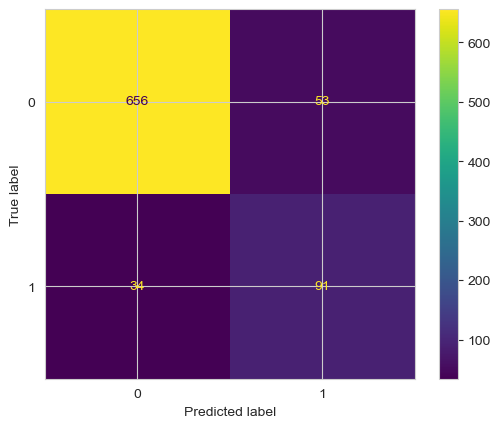

In [51]:
#using the function above the draw confusion matrix 
evaluate_model_metrics(best_model, X_train_resampled, y_train_resampled, X_test, y_test)

In [52]:
#using predefined function to check for classification report
grid_search = generate_classification_report(y_test, y_test_pred)
grid_search

,precision,recall,f1-score,support
0,0.950725,0.925247,0.937813,709.000000
1,0.631944,0.728000,0.676580,125.000000
accuracy,0.895683,0.895683,0.895683,0.895683
macro avg,0.791335,0.826623,0.807196,834.000000
weighted avg,0.902946,0.895683,0.898659,834.000000


* After tuning the parameters for the random forest classifier using grid search our model improved on its performance as explained below
- The accuracy of the random forest model is now at `89.6%`, which indicates that the model correctly predicted the class labels for the test data with an accuracy of approximately `89.6%` and predicted train data with `92.2%.` hence perfect for predicting customer churn. 
* The confusion matrix in tuned parameter represents TP as `91`, TN as `656`, FP as `53` and FN `34` which is best in making prediction


### 2. Decision Tree Classifier 

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid for grid search
dt_param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create an instance of DecisionTreeClassifier
dt_clf_final= DecisionTreeClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=dt_clf_final, param_grid=dt_param_grid, cv=5)

# Fit the grid search to the resampled training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best hyperparameters found during the grid search
best_params = grid_search.best_params_

# Create a new DecisionTreeClassifier with the best hyperparameters
best_model_2 = DecisionTreeClassifier(**best_params)

# Fit the best model to the resampled training data
best_model_2.fit(X_train_resampled, y_train_resampled)

# Predict on the training and test data
y_train_pred = best_model_2.predict(X_train_resampled)
y_test_pred = best_model_2.predict(X_test)

# Calculate accuracy on the training and test data
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

{'roc_auc_train': 0.9110228865016345,
 'roc_auc_test': 0.8583695345557123,
 'accuracy_train': 0.9110228865016348,
 'accuracy_test': 0.9328537170263789,
 'confusion_matrix_train': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x1e4f94e8880>}

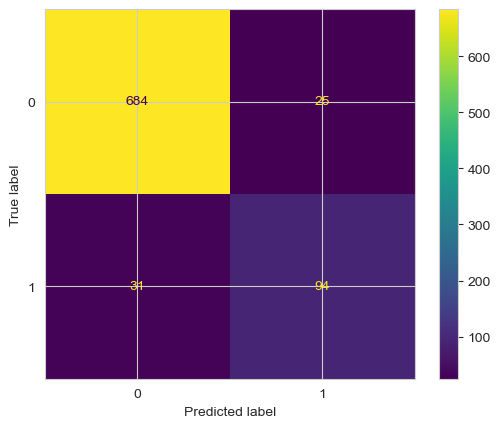

In [54]:
evaluate_model_metrics(best_model_2, X_train_resampled, y_train_resampled, X_test, y_test)

The tuned decision tree model train accuracy dropped t0 `91.0%` and increased to `93.9%` on the test data. This indicates that the model is performing well and has learned patterns in the data that allow it to make accurate predictions.
The logistic regression model achieved an AUC-ROC score of approximately `91.0%` on the training data and `87.5%` on the test data.

## Evaluation 

#### 1.Based on accuracy level 


* Based on the three models the accuracy in making predictions of customer churn are as follows: 
* Logistic regression performs poorly  with `85.9%`
* Random forest classifier has `87.1%` accuracy
* Decision trees perform pretty well with `91.5%` .
- In order to improve our prediction accuracy we hypertuned the models using gridsearch. 
- After the hyperparameter tuning ; decision tree model results improved to `91.0%` accuracy on training data and `93.9%` on testing data. Random forest results improved to `92.2%` on training data and `89.6` on testing data. 
- 
- From the above analysis Decision Tree performed the best.   

#### 2. Using ROC curve to check the best model 


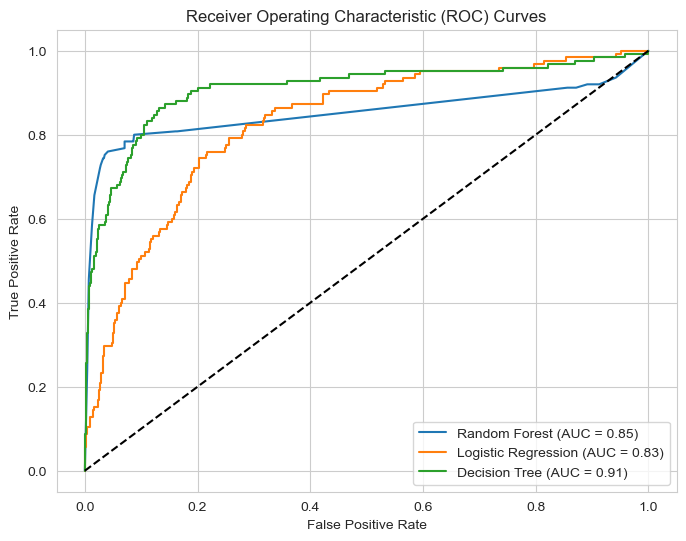

In [55]:
#drawing ROC curve for the above three models 

# Compute ROC curves and AUC scores for each model
models = [best_model_2, logreg_final, best_model]
labels = ['Random Forest', 'Logistic Regression', 'Decision Tree']

plt.figure(figsize=(8, 6))

for model, label in zip(models, labels):
    if hasattr(model, "predict_proba"):
        y_probs = model.predict_proba(X_test)[:, 1]
    else:
        y_probs = model.predict(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    auc_score = roc_auc_score(y_test, y_probs)

    plt.plot(fpr, tpr, label='{} (AUC = {:.2f})'.format(label, auc_score))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend()
plt.show()



Here are the AUC scores for each model:

- Logistic Regression: AUC = 0.83
- Decision Tree: AUC = 0.91
- Random Forest: AUC = 0.85

In summary, the ROC curves and AUC scores provide a visual and quantitative assessment of the models' ability to discriminate between the classes. A higher AUC score generally suggests better performance. Based on these results, the Decision Tree model has the highest AUC score, indicating it is the most effective at distinguishing between the classes in SyriaTel dataset.Followed by the Random Forest and lastly the Logistic Regression models.

### SUMMARY: CONCLUSION AND RECOMMENDATIONS
- After developing and training the 3 classifications models, I went ahead th evaluate the models using appropriate metrics as evidenced above. The Decision Tree model emerged as the best model with a robust performance.
- We will integrate the Decision Tree model into SyriaTel existing systems for seamless prediction of customer churn.
- I will establish a monitoring system to track the model performance in real time and conduct periodic model re-evaluations and updates as necessary.

### THE IMPLEMENTATION OF THE MODEL WILL ACHIEVE THE FOLLOWING OBJECTIVES
 
 1. **Reduce Customer Churn Rate:** The Decision Tree is a predictive model that accurately identifies customers at risk of churning. By doing so, we aim to reduce the overall customer churn rate and subsequently minimize revenue loss.

2. **Increase Customer Retention:** SyrialTel will implement targeted retention strategies for the identified at-risk customers. This includes personalized offers, improved customer service, and proactive communication to encourage continued business with SyriaTel.

3. **Optimize Marketing Spend:** By predicting customer churn, we can allocate marketing resources more efficiently. Focus can be shifted towards retaining high-value customers and acquiring new customers, rather than expending resources on customers likely to churn.

4. **Improve Customer Satisfaction:** Understanding the factors leading to churn enables us to address pain points and enhance the overall customer experience. This, in turn, contributes to improved customer satisfaction and loyalty.
